# Lectura de datos real

In [11]:
import pandas as pd

In [12]:
datos=pd.read_csv('Medidasprueba3.csv', sep=';')
datos

,Cups,Fecha de la lectura,Hora de la lectura,Consumo (kwh)
0,ES0022000005731860JV1P,01/01/2018,0:15,7
1,ES0022000005731860JV1P,01/01/2018,0:30,7
2,ES0022000005731860JV1P,01/01/2018,0:45,7
3,ES0022000005731860JV1P,01/01/2018,1:00,7
4,ES0022000005731860JV1P,01/01/2018,1:15,7
...,...,...,...,...
35035,ES0022000005731860JV1P,31/12/2018,23:00,6
35036,ES0022000005731860JV1P,31/12/2018,23:15,6
35037,ES0022000005731860JV1P,31/12/2018,23:30,6
35038,ES0022000005731860JV1P,31/12/2018,23:45,6


In [13]:
import datetime

In [15]:
#Aqui transformamos las medidas que obtenemos de la curva de carga (formato de string) a formato float
#y los almacenamos en una lista

#Lista que almacena los valores

consumos_list = datos['Consumo (kwh)'] 
consumos_num=[]

#Bucle
for valor in consumos_list:
    
    #Reemplazo la coma por un punto
    #valor = valor.replace(',', '.')
    
    #Convierto el string a float
    valor_num = float(valor)
    
    #Inserto el float en la lista
    consumos_num.append(valor_num)

#Compruebo que está creada correctamente
#print(consumos_num)

In [112]:
import numpy as np
import matplotlib.pyplot as plt

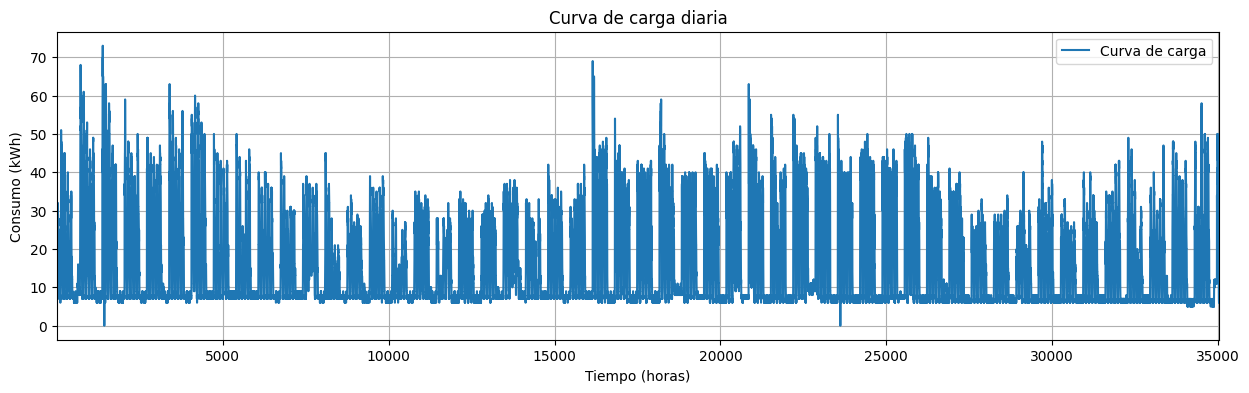

In [17]:
#Creo el vector de tiempos para la gráfica y compruebo que está bien
if datos['Hora de la lectura'][2][0:1]!=datos['Hora de la lectura'][3][0:1]:  #No es verdad, en el cambio de hora nunca se cumple
    #print("Cuartohoraria")
    y=list(np.arange(1,25,0.25))
    y=list(np.arange(1,35041,1))
else:
    #print ("No cuartohoraria")
    y=list(range(1, 25))
#print(y)

# Visualizamos la curva de carga
plt.figure(figsize=(15,4))  # Ancho x Alto en pulgadas
plt.plot(y,consumos_num, label="Curva de carga")
plt.xlabel("Tiempo (horas)")
#plt.xticks(y)
plt.xlim([1,35041])
plt.ylabel("Consumo (kWh)")
#plt.yticks(np.arange(0,1.05,0.1))
plt.legend()
plt.grid()
plt.title("Curva de carga diaria")
plt.show()

In [18]:
import datetime
import locale  #Para que de el día en español

# Configurar el idioma a español
locale.setlocale(locale.LC_TIME, 'es_ES')

# Crear un objeto de fecha para el 1 de octubre de 2017
fecha = datetime.date(2018, 1, 1)

# Obtener el nombre del día de la semana
nombre_del_dia = fecha.strftime('%A')

print(nombre_del_dia)
type(nombre_del_dia)
#print(f"El 1 de octubre de 2017 fue un {nombre_del_dia}.")

lunes


str

In [19]:
#Código para recorrer toda la tabla, crear un vector con los días de la semana, meses y año, y ponerlo en la tabla
fechas_list = datos['Fecha de la lectura']

type(fechas_list)

dias_semana = []
meses = []
anos = []

for fecha in fechas_list:
    dia = int(fecha[0:2])
    mes = int(fecha[3:5])
    ano = int(fecha[6:10])
    fecha = datetime.date(ano,mes,dia)
    nombre_dia = fecha.strftime('%A')
    #print(nombre_dia)
    dias_semana.append(nombre_dia)
    meses.append(mes)
    anos.append(ano)

In [20]:
#Código para recorrer toda la tabla, crear un vector con las horas y los minutos, y ponerlo en la tabla
horas_list = datos['Hora de la lectura']

horas = []
minutos = []

for hora in horas_list:
    h = hora[0:2]
    m = hora[2:5]
    
    if h[1]==":":  #Eliminamos los 2 puntos cuando la hora es de 2 cifras
        h = hora[0:1]
    
    if m[0]==":":  #Eliminamos los 2 puntos cuando la hora es de 2 cifras
        m = hora[3:5]
    if m=="00": #En el caso que la hora sea en punto, pasamos a 45 min
        m = "45"
        if h=="0":  #Si es hora 0, pasamos a las 23h
            h = "23"
        else:  #Resto de casos en los que la hora no es 0, restamos 1h
            h = str(int(h)-1)
    else:  #En el caso de que la hora no sea en punto, restamos 15 minutos
        m = str(int(m)-15)
            
    #print(m)
    
    horas.append(h)
    #print(type(m))
    minutos.append(m)
    #print(h+"--"+m)
    #print(h[1])
#print(len(meses))
#print(type(meses[1]))

In [21]:
# Insertar la nueva columna en una ubicación específica, en este caso después de la columna 'A'
#datos.insert(loc=4, column='Dia de la semana', value=dias_semana)
#pd.set_option('display.max_rows', None)  # Mostrar todas las filas
datos["Hora inicio"]=horas
datos["Minutos inicio"]=minutos
datos["Dia de la semana"]=dias_semana
datos["Mes"]=meses
datos["Año"]=anos

# Imprimir el DataFrame resultante
datos

,Cups,Fecha de la lectura,Hora de la lectura,Consumo (kwh),Hora inicio,Minutos inicio,Dia de la semana,Mes,Año
0,ES0022000005731860JV1P,01/01/2018,0:15,7,0,0,lunes,1,2018
1,ES0022000005731860JV1P,01/01/2018,0:30,7,0,15,lunes,1,2018
2,ES0022000005731860JV1P,01/01/2018,0:45,7,0,30,lunes,1,2018
3,ES0022000005731860JV1P,01/01/2018,1:00,7,0,45,lunes,1,2018
4,ES0022000005731860JV1P,01/01/2018,1:15,7,1,0,lunes,1,2018
...,...,...,...,...,...,...,...,...,...
35035,ES0022000005731860JV1P,31/12/2018,23:00,6,22,45,lunes,12,2018
35036,ES0022000005731860JV1P,31/12/2018,23:15,6,23,0,lunes,12,2018
35037,ES0022000005731860JV1P,31/12/2018,23:30,6,23,15,lunes,12,2018
35038,ES0022000005731860JV1P,31/12/2018,23:45,6,23,30,lunes,12,2018


In [22]:
#Importo una tabla con todos los periodos
periodos=pd.read_csv('Periodos.csv', sep=';',encoding='iso-8859-1')
periodos

,Hora,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,"Sabados, domingos y festivos"
0,0 a 1h,P6,P6,P6,P6,P6,P6,P6,P6,P6,P6,P6,P6,P6
1,1 a 2h,P6,P6,P6,P6,P6,P6,P6,P6,P6,P6,P6,P6,P6
2,2 a 3h,P6,P6,P6,P6,P6,P6,P6,P6,P6,P6,P6,P6,P6
3,3 a 4h,P6,P6,P6,P6,P6,P6,P6,P6,P6,P6,P6,P6,P6
4,4 a 5h,P6,P6,P6,P6,P6,P6,P6,P6,P6,P6,P6,P6,P6
5,5 a 6h,P6,P6,P6,P6,P6,P6,P6,P6,P6,P6,P6,P6,P6
6,6 a 7h,P6,P6,P6,P6,P6,P6,P6,P6,P6,P6,P6,P6,P6
7,7 a 8h,P6,P6,P6,P6,P6,P6,P6,P6,P6,P6,P6,P6,P6
8,8 a 9h,P2,P2,P3,P5,P5,P4,P2,P4,P4,P5,P3,P2,P6
9,9 a 10h,P1,P1,P2,P4,P4,P3,P1,P3,P3,P4,P2,P1,P6


In [23]:
#Esto lo hago para crear un vector de los periodos y agregarlo a la tabla
import calendar

#Necesito la hora, día de la semana y mes
horas_list = datos['Hora inicio']
dias_list = datos['Dia de la semana']
meses_list = datos['Mes']

#enero, febrero, julio y diciembre
#marzo y noviembre
#abril, mayo y octubre
#junio, agosto y septiembre

periodos_list = []

for i in range(len(datos)):
    if dias_list[i]=="sábado" or dias_list[i]=="domingo": #Fines de semana (faltan agregar los festivos)
        #print(horas_list[i]+"-"+dias_list[i]+" = P6")
        periodos_list.append("P6")
    else:  #El resto de dias
        nombre_mes = calendar.month_name[meses_list[i]].capitalize()
        #print(horas_list[i]+"-"+dias_list[i]+" = "+periodos.loc[int(horas_list[i]), calendar.month_name[meses_list[i]].capitalize()])
        periodos_list.append(periodos.loc[int(horas_list[i]), calendar.month_name[meses_list[i]].capitalize()])
        

In [24]:
#Coloco el vector de periodos en la tabla
datos["Periodo"]=periodos_list

# Imprimir el DataFrame resultante
datos

,Cups,Fecha de la lectura,Hora de la lectura,Consumo (kwh),Hora inicio,Minutos inicio,Dia de la semana,Mes,Año,Periodo
0,ES0022000005731860JV1P,01/01/2018,0:15,7,0,0,lunes,1,2018,P6
1,ES0022000005731860JV1P,01/01/2018,0:30,7,0,15,lunes,1,2018,P6
2,ES0022000005731860JV1P,01/01/2018,0:45,7,0,30,lunes,1,2018,P6
3,ES0022000005731860JV1P,01/01/2018,1:00,7,0,45,lunes,1,2018,P6
4,ES0022000005731860JV1P,01/01/2018,1:15,7,1,0,lunes,1,2018,P6
...,...,...,...,...,...,...,...,...,...,...
35035,ES0022000005731860JV1P,31/12/2018,23:00,6,22,45,lunes,12,2018,P2
35036,ES0022000005731860JV1P,31/12/2018,23:15,6,23,0,lunes,12,2018,P2
35037,ES0022000005731860JV1P,31/12/2018,23:30,6,23,15,lunes,12,2018,P2
35038,ES0022000005731860JV1P,31/12/2018,23:45,6,23,30,lunes,12,2018,P2


In [25]:
#Importo una tabla con todas las tarifas
tarifas=pd.read_csv('Tarifas.csv', sep=';',encoding='iso-8859-1')
tarifas

,Grupo tarifario,P1,P2,P3,P4,P5,P6
0,2.0 TD,"22,39314","1,150425",,,,
1,3.0 TD,"10,267292","10,039843","2,651271","2,303199","1,381933","1,381933"
2,6.1 TD,"19,108658","17,911151","8,925198","7,158278","0,506199","0,506199"
3,6.2 TD,"13,561685","13,526788","5,420822","4,094881","0,374203","0,374203"
4,6.3 TD,"9,880203","9,471228","4,79692","3,592008","0,487055","0,487055"
5,6.4 TD,"8,443077","7,27911","3,590719","2,751326","0,349732","0,349732"


In [26]:
#Creo listas donde almaceno los valores de precios de cada una de las tarifas

tarifa2_0 = tarifas.loc[0][1:]
tarifa3_0 = tarifas.loc[1][1:]
tarifa6_1 = []

for i in tarifas.loc[2][1:]:
    tarifa6_1.append(float(i.replace(",",".")))

tarifa6_2 = tarifas.loc[3][1:]
tarifa6_3 = tarifas.loc[4][1:]
tarifa6_4 = tarifas.loc[5][1:]
type(tarifa6_1)

list

PRUEBAS CON PYOMO

DATOS DE PRUEBA 1

In [54]:

# Datos del problema 6.1 TD
Tp_p_values = [20.557850, 12.762884, 9.926251, 7.848380, 0.325141, 0.325141]  # euros/kW año
k_p_values = [1.000000, 0.620828, 0.482845, 0.381770, 0.015816, 0.015816]
tep_value = 3.566788  # euros/kW


Pd_pj_values = {
    1: [12, 14, 10, 1],
    2: [16, 18, 22, 2, 3, 4, 5, 6, 7],
    3: [8, 12],
    4: [8, 12, 14, 5],
    5: [8, 12, 14, 7, 8, 9],
    6: [8, 12, 14],
}

DATOS DE PRUEBA DE 1 MES

In [104]:
# Datos del problema 6.1 TD
Tp_p_values = [20.557850, 12.762884, 9.926251, 7.848380, 0.325141, 0.325141]  # euros/kW año
k_p_values = [1.000000, 0.620828, 0.482845, 0.381770, 0.015816, 0.015816]
tep_value = 3.566788  # euros/kW

# Crear un diccionario vacío
Pd_pj_values = {
    1: [],
    2: [],
    3: [],
    4: [],
    5: [],
    6: []
}

# 1 mes --> 2977  -   MB
# 2 meses --> 5665  -   MB
# 3 meses --> 8637  -   MB
# 4 meses --> 11517  -  4086 MB
# 5 meses --> 14493  -  9262 MB
# 6 meses --> 17373  -   MB

# Iterar sobre cada período y agregar los consumos correspondientes al diccionario
for periodo, grupo in datos.head(5665).groupby('Periodo'):
    # Extraer el número del período eliminando la letra 'P'
    numero_periodo = int(periodo[1:])
    Pd_pj_values[numero_periodo] = list(grupo['Consumo (kwh)'])

print(Pd_pj_values)

{1: [28, 28, 27, 27, 26, 28, 28, 26, 26, 25, 26, 25, 25, 25, 23, 24, 24, 23, 24, 23, 23, 22, 23, 24, 22, 25, 23, 22, 8, 9, 8, 9, 8, 8, 9, 8, 47, 46, 46, 47, 46, 44, 47, 46, 42, 42, 41, 41, 44, 43, 43, 44, 43, 44, 42, 42, 15, 15, 14, 15, 14, 15, 15, 14, 14, 14, 13, 12, 12, 10, 9, 8, 45, 43, 44, 45, 42, 42, 42, 42, 41, 38, 37, 36, 35, 33, 28, 32, 30, 30, 31, 29, 20, 21, 21, 21, 21, 21, 21, 19, 14, 12, 11, 11, 9, 9, 9, 9, 38, 39, 39, 39, 40, 39, 39, 40, 39, 36, 33, 33, 32, 34, 33, 33, 32, 33, 33, 32, 18, 18, 18, 22, 21, 19, 15, 14, 13, 11, 12, 11, 10, 9, 9, 9, 27, 28, 28, 29, 34, 34, 32, 33, 30, 30, 28, 30, 31, 31, 33, 35, 25, 24, 24, 23, 12, 13, 12, 12, 12, 12, 10, 9, 8, 9, 8, 9, 9, 8, 9, 8, 52, 51, 53, 54, 55, 57, 68, 64, 63, 60, 54, 59, 58, 57, 57, 57, 56, 55, 56, 54, 42, 45, 40, 42, 41, 38, 37, 34, 18, 13, 14, 13, 13, 13, 11, 9, 60, 56, 53, 59, 61, 59, 58, 57, 59, 59, 58, 55, 55, 51, 49, 52, 51, 49, 45, 47, 42, 42, 37, 35, 35, 34, 34, 29, 16, 15, 14, 14, 14, 13, 12, 10, 49, 45, 51, 49

DATOS DE PRUEBA REALES 1 AÑO

In [ ]:
# Datos del problema 6.1 TD
Tp_p_values = [20.557850, 12.762884, 9.926251, 7.848380, 0.325141, 0.325141]  # euros/kW año
k_p_values = [1.000000, 0.620828, 0.482845, 0.381770, 0.015816, 0.015816]
tep_value = 3.566788  # euros/kW

# Crear un diccionario vacío
Pd_pj_values = {
    1: [],
    2: [],
    3: [],
    4: [],
    5: [],
    6: []
}

# Iterar sobre cada período y agregar los consumos correspondientes al diccionario
for periodo, grupo in datos.groupby('Periodo'):
    # Extraer el número del período eliminando la letra 'P'
    numero_periodo = int(periodo[1:])
    Pd_pj_values[numero_periodo] = list(grupo['Consumo (kwh)'])

In [95]:
#FORMA PARA LOS EXCESOS CALCULADOS CON LA RAIZ DEL CUADRADO DE LOS EXCESOS
from pyomo.environ import *


# Crear el modelo
model = ConcreteModel()

# Índices
model.p = Set(initialize=range(len(Tp_p_values)))
#model.j = Set(initialize=range(100-1))  # Índice para j, el número de medidas
model.j1 = Set(initialize=range(len( Pd_pj_values[1])))  # Índice para j, el número de medidas
model.j2 = Set(initialize=range(len( Pd_pj_values[2])))  # Índice para j, el número de medidas
model.j3 = Set(initialize=range(len( Pd_pj_values[3])))  # Índice para j, el número de medidas
model.j4 = Set(initialize=range(len( Pd_pj_values[4])))  # Índice para j, el número de medidas
model.j5 = Set(initialize=range(len( Pd_pj_values[5])))  # Índice para j, el número de medidas
model.j6 = Set(initialize=range(len( Pd_pj_values[6])))  # Índice para j, el número de medidas

print(len(Pd_pj_values[1]))
print(len(Pd_pj_values[2]))
print(len(Pd_pj_values[3]))
print(len(Pd_pj_values[4]))
print(len(Pd_pj_values[5]))
print(len(Pd_pj_values[6]))

# Introducir una variable adicional para representar la expresión max(0, x)
model.max_term_1 = Var(model.j1, within=NonNegativeReals, initialize=0.0)
model.max_term_2 = Var(model.j2, within=NonNegativeReals, initialize=0.0)
model.max_term_3 = Var(model.j3, within=NonNegativeReals, initialize=0.0)
model.max_term_4 = Var(model.j4, within=NonNegativeReals, initialize=0.0)
model.max_term_5 = Var(model.j5, within=NonNegativeReals, initialize=0.0)
model.max_term_6 = Var(model.j6, within=NonNegativeReals, initialize=0.0)

# Variables de decisión
model.Pc_p = Var(model.p, within=NonNegativeReals, initialize=100.0, bounds=(0, 1000.0))
Pc_p_optimo = [0,0,0,0,0,0]

# Establecer la precisión de los valores iniciales
for p in model.p:
    model.Pc_p[p].value = round(model.Pc_p[p].value, 1) if model.Pc_p[p].value is not None else None

epsilon = 1e-6  # Ajusta este valor según sea necesario

# Función objetivo
def objetivo_rule(model):
    sum_terms = 0

    # Términos que no involucran la raíz cuadrada
    sum_terms += Tp_p_values[0] * model.Pc_p[0]
    sum_terms += Tp_p_values[1] * model.Pc_p[1]
    sum_terms += Tp_p_values[2] * model.Pc_p[2]
    sum_terms += Tp_p_values[3] * model.Pc_p[3]
    sum_terms += Tp_p_values[4] * model.Pc_p[4]
    sum_terms += Tp_p_values[5] * model.Pc_p[5]

    # Términos con raíz cuadrada
    sum_terms += k_p_values[0] * tep_value * sqrt(sum((model.max_term_1[j]**2 + epsilon) for j in model.j1))
    sum_terms += k_p_values[1] * tep_value * sqrt(sum((model.max_term_2[j]**2 + epsilon) for j in model.j2))
    sum_terms += k_p_values[2] * tep_value * sqrt(sum((model.max_term_3[j]**2 + epsilon) for j in model.j3))
    sum_terms += k_p_values[3] * tep_value * sqrt(sum((model.max_term_4[j]**2 + epsilon) for j in model.j4))
    sum_terms += k_p_values[4] * tep_value * sqrt(sum((model.max_term_5[j]**2 + epsilon) for j in model.j5))
    sum_terms += k_p_values[5] * tep_value * sqrt(sum((model.max_term_6[j]**2 + epsilon) for j in model.j6))

    return sum_terms

model.objetivo = Objective(rule=objetivo_rule, sense=minimize)


# Restricciones
def restriccion_1_rule(model, p):
    # Pc_p <= Pc_p+1 para p en el rango de 1 a len(Tp_p_values)-1
    if p < len(Tp_p_values) - 1:
        return model.Pc_p[p] <= model.Pc_p[p + 1]
    else:
        return Constraint.Skip

def restriccion_2_rule(model, p):
    # Pc_p >= 0 para todos los p
    return model.Pc_p[p] >= 0


def restriccion_3_rule1(model, j1):
    # Pd_pj - Pc_p >= 0 para todos los p y j
    return model.max_term_1[j1] >= 0

def restriccion_3_rule2(model, j2):
    # Pd_pj - Pc_p >= 0 para todos los p y j
    return model.max_term_2[j2] >= 0

def restriccion_3_rule3(model, j3):
    # Pd_pj - Pc_p >= 0 para todos los p y j
    return model.max_term_3[j3] >= 0

def restriccion_3_rule4(model, j4):
    # Pd_pj - Pc_p >= 0 para todos los p y j
    return model.max_term_4[j4] >= 0

def restriccion_3_rule5(model, j5):
    # Pd_pj - Pc_p >= 0 para todos los p y j
    return model.max_term_5[j5] >= 0

def restriccion_3_rule6(model, j6):
    # Pd_pj - Pc_p >= 0 para todos los p y j
    return model.max_term_6[j6] >= 0

def restriccion_4_rule1(model, j1):
    # Pd_pj - Pc_p >= 0 para todos los p y j
    return model.max_term_1[j1] >= Pd_pj_values[1][j1] - model.Pc_p[0]

def restriccion_4_rule2(model, j2):
    # Pd_pj - Pc_p >= 0 para todos los p y j
    return model.max_term_2[j2] >= Pd_pj_values[2][j2] - model.Pc_p[1]

def restriccion_4_rule3(model, j3):
    # Pd_pj - Pc_p >= 0 para todos los p y j
    return model.max_term_3[j3] >= Pd_pj_values[3][j3] - model.Pc_p[2]

def restriccion_4_rule4(model, j4):
    # Pd_pj - Pc_p >= 0 para todos los p y j
    return model.max_term_4[j4] >= Pd_pj_values[4][j4] - model.Pc_p[3]

def restriccion_4_rule5(model, j5):
    # Pd_pj - Pc_p >= 0 para todos los p y j
    return model.max_term_5[j5] >= Pd_pj_values[5][j5] - model.Pc_p[4]

def restriccion_4_rule6(model, j6):
    # Pd_pj - Pc_p >= 0 para todos los p y j
    return model.max_term_6[j6] >= Pd_pj_values[6][j6] - model.Pc_p[5]


# Agregar restricciones al modelo
model.restriccion_1 = Constraint(model.p, rule=restriccion_1_rule)
model.restriccion_2 = Constraint(model.p, rule=restriccion_2_rule)
model.restriccion_31 = Constraint(model.j1, rule=restriccion_3_rule1)
model.restriccion_32 = Constraint(model.j2, rule=restriccion_3_rule2)
model.restriccion_33 = Constraint(model.j3, rule=restriccion_3_rule3)
model.restriccion_34 = Constraint(model.j4, rule=restriccion_3_rule4)
model.restriccion_35 = Constraint(model.j5, rule=restriccion_3_rule5)
model.restriccion_36 = Constraint(model.j6, rule=restriccion_3_rule6)
model.restriccion_41 = Constraint(model.j1, rule=restriccion_4_rule1)
model.restriccion_42 = Constraint(model.j2, rule=restriccion_4_rule2)
model.restriccion_43 = Constraint(model.j3, rule=restriccion_4_rule3)
model.restriccion_44 = Constraint(model.j4, rule=restriccion_4_rule4)
model.restriccion_45 = Constraint(model.j5, rule=restriccion_4_rule5)
model.restriccion_46 = Constraint(model.j6, rule=restriccion_4_rule6)

# Resolver el modelo con Gurobi y mostrar el log
solver = SolverFactory('ipopt')
results = solver.solve(model, tee=True)
#solver.options['mumps_mem_percent'] = 0.1  # Por ejemplo, intenta con un 10% de la memoria
#solver.options['linear_solver'] = 'ma57'  # O 'ma97'


# Imprimir los resultados
print(results)

# Imprimir los valores óptimos de Pc_p
print("Valores óptimos de Pc_p:")
for p in model.p:
    print(f"Pc_p[{p}] = {model.Pc_p[p].value}")

# Imprimir el valor óptimo de la función objetivo
print("Valor óptimo de la función objetivo:", model.objetivo())

# Imprimir los valores óptimos de Pc_p redondeados a un decimal
print("Valores óptimos de Pc_p:")
for p in model.p:
    print(f"Pc_p[{p}] = {round(model.Pc_p[p].value, 1)}")
    Pc_p_optimo[p]=round(model.Pc_p[p].value, 1)

# Imprimir el valor óptimo de la función objetivo redondeado a un decimal
print("Valor óptimo de la función objetivo:", round(model.objetivo(), 1))

1548
1996
616
0
0
4477
Ipopt 3.14.13: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.13, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:    25927
Number of nonzeros in Lagrangian Hessian.............: 13405971

Total number of variables............................:     8643
                     variables with only lower bounds:     8637
                variables with lower and upper bounds:        6
                     variables with only upper bounds:        0
Total number of equality constraints.................

In [111]:
#FORMA PARA LOS EXCESOS CALCULADOS CON LA RAIZ DEL CUADRADO DE LOS EXCESOS
from pyomo.environ import *


# Crear el modelo
model = ConcreteModel()

# Índices
model.p = Set(initialize=range(len(Tp_p_values)))
#model.j = Set(initialize=range(100-1))  # Índice para j, el número de medidas
model.j1 = Set(initialize=range(len( Pd_pj_values[1])))  # Índice para j, el número de medidas
model.j2 = Set(initialize=range(len( Pd_pj_values[2])))  # Índice para j, el número de medidas
model.j3 = Set(initialize=range(len( Pd_pj_values[3])))  # Índice para j, el número de medidas
model.j4 = Set(initialize=range(len( Pd_pj_values[4])))  # Índice para j, el número de medidas
model.j5 = Set(initialize=range(len( Pd_pj_values[5])))  # Índice para j, el número de medidas
model.j6 = Set(initialize=range(len( Pd_pj_values[6])))  # Índice para j, el número de medidas

print(len(Pd_pj_values[1]))
print(len(Pd_pj_values[2]))
print(len(Pd_pj_values[3]))
print(len(Pd_pj_values[4]))
print(len(Pd_pj_values[5]))
print(len(Pd_pj_values[6]))

# Introducir una variable adicional para representar la expresión max(0, x)
model.max_term_1 = Var(model.j1, within=NonNegativeReals, initialize=0.0)
model.max_term_2 = Var(model.j2, within=NonNegativeReals, initialize=0.0)
model.max_term_3 = Var(model.j3, within=NonNegativeReals, initialize=0.0)
model.max_term_4 = Var(model.j4, within=NonNegativeReals, initialize=0.0)
model.max_term_5 = Var(model.j5, within=NonNegativeReals, initialize=0.0)
model.max_term_6 = Var(model.j6, within=NonNegativeReals, initialize=0.0)

# Variables de decisión
model.Pc_p = Var(model.p, within=NonNegativeReals, initialize=100.0, bounds=(0, 1000.0))
Pc_p_optimo = [0,0,0,0,0,0]

# Establecer la precisión de los valores iniciales
for p in model.p:
    model.Pc_p[p].value = round(model.Pc_p[p].value, 1) if model.Pc_p[p].value is not None else None

epsilon = 1e-10  # Ajusta este valor según sea necesario

# Función objetivo
def objetivo_rule(model):
    sum_terms = 0

    # Términos que no involucran la raíz cuadrada
    sum_terms += Tp_p_values[0] * model.Pc_p[0]
    sum_terms += Tp_p_values[1] * model.Pc_p[1]
    sum_terms += Tp_p_values[2] * model.Pc_p[2]
    sum_terms += Tp_p_values[3] * model.Pc_p[3]
    sum_terms += Tp_p_values[4] * model.Pc_p[4]
    sum_terms += Tp_p_values[5] * model.Pc_p[5]
    

    # Términos con raíz cuadrada
    sum_terms += k_p_values[0] * tep_value * sqrt(sum((model.max_term_1[j]**2) for j in model.j1) + epsilon)
    sum_terms += k_p_values[1] * tep_value * sqrt(sum((model.max_term_2[j]**2) for j in model.j2) + epsilon)
    sum_terms += k_p_values[2] * tep_value * sqrt(sum((model.max_term_3[j]**2) for j in model.j3) + epsilon)
    sum_terms += k_p_values[3] * tep_value * sqrt(sum((model.max_term_4[j]**2) for j in model.j4) + epsilon)
    sum_terms += k_p_values[4] * tep_value * sqrt(sum((model.max_term_5[j]**2) for j in model.j5) + epsilon)
    sum_terms += k_p_values[5] * tep_value * sqrt(sum((model.max_term_6[j]**2) for j in model.j6) + epsilon)

    return sum_terms

model.objetivo = Objective(rule=objetivo_rule, sense=minimize)


# Restricciones
def restriccion_1_rule(model, p):
    # Pc_p <= Pc_p+1 para p en el rango de 1 a len(Tp_p_values)-1
    if p < len(Tp_p_values) - 1:
        return model.Pc_p[p] <= model.Pc_p[p + 1]
    else:
        return Constraint.Skip

def restriccion_2_rule(model, p):
    # Pc_p >= 0 para todos los p
    return model.Pc_p[p] >= 0


def restriccion_3_rule1(model, j1):
    # Pd_pj - Pc_p >= 0 para todos los p y j
    return model.max_term_1[j1] >= 0

def restriccion_3_rule2(model, j2):
    # Pd_pj - Pc_p >= 0 para todos los p y j
    return model.max_term_2[j2] >= 0

def restriccion_3_rule3(model, j3):
    # Pd_pj - Pc_p >= 0 para todos los p y j
    return model.max_term_3[j3] >= 0

def restriccion_3_rule4(model, j4):
    # Pd_pj - Pc_p >= 0 para todos los p y j
    return model.max_term_4[j4] >= 0

def restriccion_3_rule5(model, j5):
    # Pd_pj - Pc_p >= 0 para todos los p y j
    return model.max_term_5[j5] >= 0

def restriccion_3_rule6(model, j6):
    # Pd_pj - Pc_p >= 0 para todos los p y j
    return model.max_term_6[j6] >= 0

def restriccion_4_rule1(model, j1):
    # Pd_pj - Pc_p >= 0 para todos los p y j
    return model.max_term_1[j1] >= Pd_pj_values[1][j1] - model.Pc_p[0]

def restriccion_4_rule2(model, j2):
    # Pd_pj - Pc_p >= 0 para todos los p y j
    return model.max_term_2[j2] >= Pd_pj_values[2][j2] - model.Pc_p[1]

def restriccion_4_rule3(model, j3):
    # Pd_pj - Pc_p >= 0 para todos los p y j
    return model.max_term_3[j3] >= Pd_pj_values[3][j3] - model.Pc_p[2]

def restriccion_4_rule4(model, j4):
    # Pd_pj - Pc_p >= 0 para todos los p y j
    return model.max_term_4[j4] >= Pd_pj_values[4][j4] - model.Pc_p[3]

def restriccion_4_rule5(model, j5):
    # Pd_pj - Pc_p >= 0 para todos los p y j
    return model.max_term_5[j5] >= Pd_pj_values[5][j5] - model.Pc_p[4]

def restriccion_4_rule6(model, j6):
    # Pd_pj - Pc_p >= 0 para todos los p y j
    return model.max_term_6[j6] >= Pd_pj_values[6][j6] - model.Pc_p[5]


# Agregar restricciones al modelo
model.restriccion_1 = Constraint(model.p, rule=restriccion_1_rule)
model.restriccion_2 = Constraint(model.p, rule=restriccion_2_rule)
model.restriccion_31 = Constraint(model.j1, rule=restriccion_3_rule1)
model.restriccion_32 = Constraint(model.j2, rule=restriccion_3_rule2)
model.restriccion_33 = Constraint(model.j3, rule=restriccion_3_rule3)
model.restriccion_34 = Constraint(model.j4, rule=restriccion_3_rule4)
model.restriccion_35 = Constraint(model.j5, rule=restriccion_3_rule5)
model.restriccion_36 = Constraint(model.j6, rule=restriccion_3_rule6)
model.restriccion_41 = Constraint(model.j1, rule=restriccion_4_rule1)
model.restriccion_42 = Constraint(model.j2, rule=restriccion_4_rule2)
model.restriccion_43 = Constraint(model.j3, rule=restriccion_4_rule3)
model.restriccion_44 = Constraint(model.j4, rule=restriccion_4_rule4)
model.restriccion_45 = Constraint(model.j5, rule=restriccion_4_rule5)
model.restriccion_46 = Constraint(model.j6, rule=restriccion_4_rule6)

# Resolver el modelo con Gurobi y mostrar el log
solver = SolverFactory('ipopt')
results = solver.solve(model, tee=True)
#solver.options['mumps_mem_percent'] = 0.1  # Por ejemplo, intenta con un 10% de la memoria
#solver.options['linear_solver'] = 'ma57'  # O 'ma97'


# Imprimir los resultados
print(results)

# Imprimir los valores óptimos de Pc_p
print("Valores óptimos de Pc_p:")
for p in model.p:
    print(f"Pc_p[{p}] = {model.Pc_p[p].value}")

# Imprimir el valor óptimo de la función objetivo
print("Valor óptimo de la función objetivo:", model.objetivo())

# Imprimir los valores óptimos de Pc_p redondeados a un decimal
print("Valores óptimos de Pc_p:")
for p in model.p:
    print(f"Pc_p[{p}] = {round(model.Pc_p[p].value, 1)}")
    Pc_p_optimo[p]=round(model.Pc_p[p].value, 1)

# Imprimir el valor óptimo de la función objetivo redondeado a un decimal
print("Valor óptimo de la función objetivo:", round(model.objetivo(), 1))

1548
1204
0
0
0
2913
Ipopt 3.14.13: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.13, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:    17011
Number of nonzeros in Lagrangian Hessian.............:  6168577

Total number of variables............................:     5671
                     variables with only lower bounds:     5665
                variables with lower and upper bounds:        6
                     variables with only upper bounds:        0
Total number of equality constraints.................: 

In [97]:
Pc_p_optimo


[48.8, 48.8, 48.8, 48.8, 48.8, 48.8]

COMPROBACION DE VALORES

In [101]:
Pc_p_optimo = [48.8, 48.8, 48.8, 48.8, 48.8, 48.8]

total=0

for periodo in Pd_pj_values.keys():
    j_values = range(len(Pd_pj_values[periodo]))
    resultado = Tp_p_values[periodo-1] * Pc_p_optimo[periodo-1] + k_p_values[periodo-1] * tep_value * sqrt(sum((Pd_pj_values[periodo][j] - Pc_p_optimo[periodo-1])**2 + epsilon for j in j_values))
     # Haz algo con el resultado, por ejemplo, imprimirlo
    total +=resultado
    print(f'Resultado para el período {periodo}: {resultado}')

print ('Total: '+str(total))

Resultado para el período 1: 4161.951928635156
Resultado para el período 2: 3306.8341260812313
Resultado para el período 3: 1800.2650190769004
Resultado para el período 4: 383.00094399999995
Resultado para el período 5: 15.8668808
Resultado para el período 6: 165.0875617674441
Total: 9833.006460360732
